In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.patches as mpatches
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
%matplotlib inline  

# This notebook consist code for different machine learning models and how the model is improved as compared to the baseline model.

In [2]:
# read the data and convert the categorical values into the one hot encoding for the machine learning models.,
math_df = pd.read_csv('student-mat.csv')
target_math = math_df.G3
math_df = math_df.drop('G1', axis = 1)
math_df = math_df.drop('G2', axis = 1)
math_df = math_df.drop('G3', axis = 1)
math_df.schoolsup = math_df.schoolsup.eq('yes').mul(1)
math_df.famsup = math_df.famsup.eq('yes').mul(1)
math_df.paid = math_df.paid.eq('yes').mul(1)
math_df.activities = math_df.activities.eq('yes').mul(1)
math_df.nursery = math_df.nursery.eq('yes').mul(1)
math_df.higher = math_df.higher.eq('yes').mul(1)
math_df.internet = math_df.internet.eq('yes').mul(1)
math_df.romantic = math_df.romantic.eq('yes').mul(1)
math_df = pd.get_dummies(math_df, columns=["school", "sex",'address', 'famsize','Pstatus', 'Mjob', 'Fjob','reason', 'guardian'])
math_train, math_test, math_target_train, math_target_test = train_test_split(math_df, target_math, test_size=0.20, random_state=42)



# Implementing a Linear Regression Model

The mean absolute error is -  3.39525440071
The root mean square error is -  4.1956461852028735


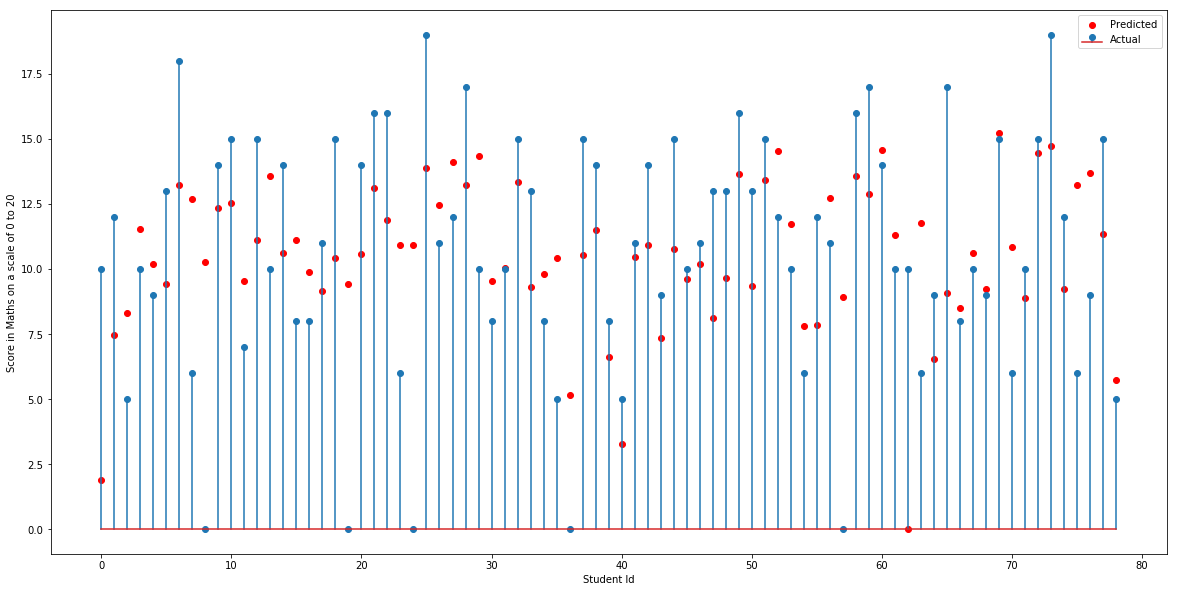

In [3]:
# Implementing a Linear regression model
# checking for the mathematics
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(math_train, math_target_train)
y_1 = lm.predict(math_test)
s = (y_1 - math_target_test.values)
s = abs(s)
soap = s.sum()
print('The mean absolute error is - ',soap/len(y_1))
rms = sqrt(mean_squared_error(math_target_test.values, y_1))
print('The root mean square error is - ',rms)
# Plotting the actual and predicted values
y = np.arange(len(y_1))
plt.figure(figsize=(20,10))
l1 = plt.scatter(y,y_1, color = 'red')
l2 = plt.stem(y,math_target_test.values,color = 'green')
plt.ylabel('Score in Maths on a scale of 0 to 20')
plt.xlabel('Student Id')
plt.legend((l1,l2),('Predicted','Actual'), loc = 'upper right')
plt.show()

From the above plot, we observe that some students have zero score. It means that they did not attended the final exam.
Let's remove all the zeros from the training and testing data and see if the performance improves.


The Mean absolute error is -  2.32306586372
The root mean square error is -  2.773233714250719


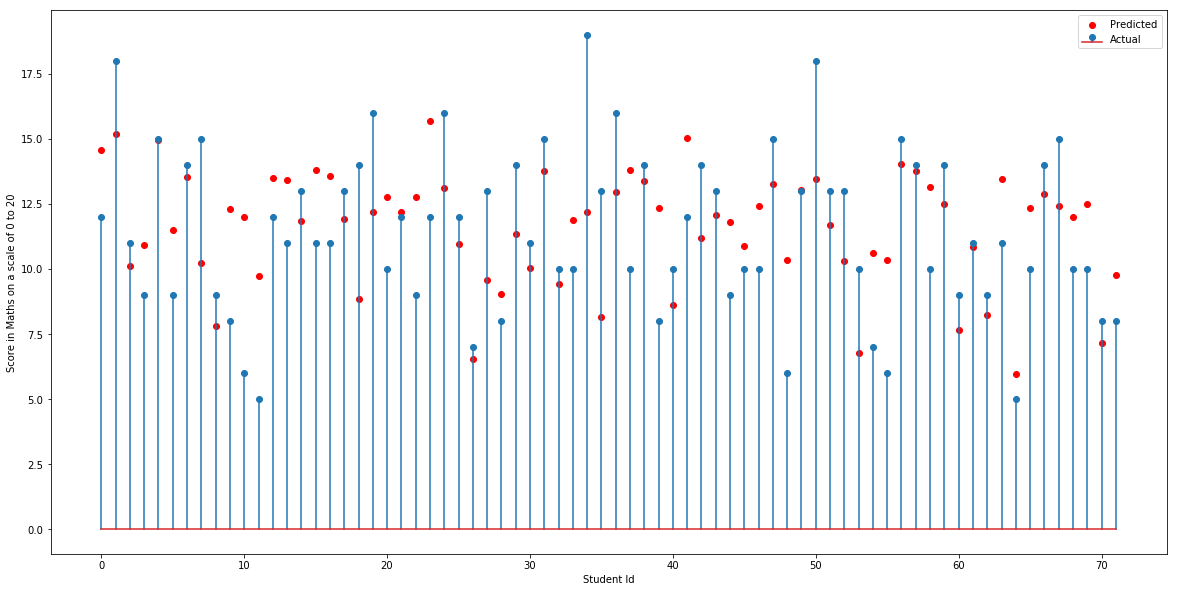

In [4]:
# removing rows from the data which has a final zero value
math_df = pd.read_csv('student-mat.csv')
math_df = math_df[math_df.G3 != 0]

target_math = math_df.G3
math_df = math_df.drop('G1', axis = 1)
math_df = math_df.drop('G2', axis = 1)
math_df = math_df.drop('G3', axis = 1)

math_df.schoolsup = math_df.schoolsup.eq('yes').mul(1)
math_df.famsup = math_df.famsup.eq('yes').mul(1)
math_df.paid = math_df.paid.eq('yes').mul(1)
math_df.activities = math_df.activities.eq('yes').mul(1)
math_df.nursery = math_df.nursery.eq('yes').mul(1)
math_df.higher = math_df.higher.eq('yes').mul(1)
math_df.internet = math_df.internet.eq('yes').mul(1)
math_df.romantic = math_df.romantic.eq('yes').mul(1)


math_df = pd.get_dummies(math_df, columns=["school", "sex",'address', 'famsize','Pstatus', 'Mjob', 'Fjob','reason', 'guardian'])
math_train, math_test, math_target_train, math_target_test = train_test_split(math_df, target_math, test_size=0.20, random_state=42)

# Creating the regression model
lm = LinearRegression()
lm.fit(math_train, math_target_train)
y_1 = lm.predict(math_test)
s = (y_1 - math_target_test.values)
s = abs(s)
soap = s.sum()
print('The Mean absolute error is - ',soap/len(y_1))
rms = sqrt(mean_squared_error(math_target_test.values, y_1))
print('The root mean square error is - ',rms)
# Plotting the actual and predicted values
y = np.arange(len(y_1))
plt.figure(figsize=(20,10))
l1 = plt.scatter(y,y_1, color = 'red')
l2 = plt.stem(y,math_target_test.values,color = 'green')
plt.ylabel('Score in Maths on a scale of 0 to 20')
plt.xlabel('Student Id')
plt.legend((l1,l2),('Predicted','Actual'), loc = 'upper right')
plt.show()

A huge improvement in the performance of the model is observed, Now lets only consider the features which had a high co relation (either positive or negative) with the final grades and see if we can improve the performance.
So, for this we will only consider features like     
1) Mother and Father education   
2) Number of Failures in past   
3) Hanging out time with friends     
4) Alcohol consumption        
5) Taking freetime, health and absence features
Reading the data again and keeping only above mentioned features-


The mean absolute error is -  2.24518090438
The root mean square error is -  2.751810454174157


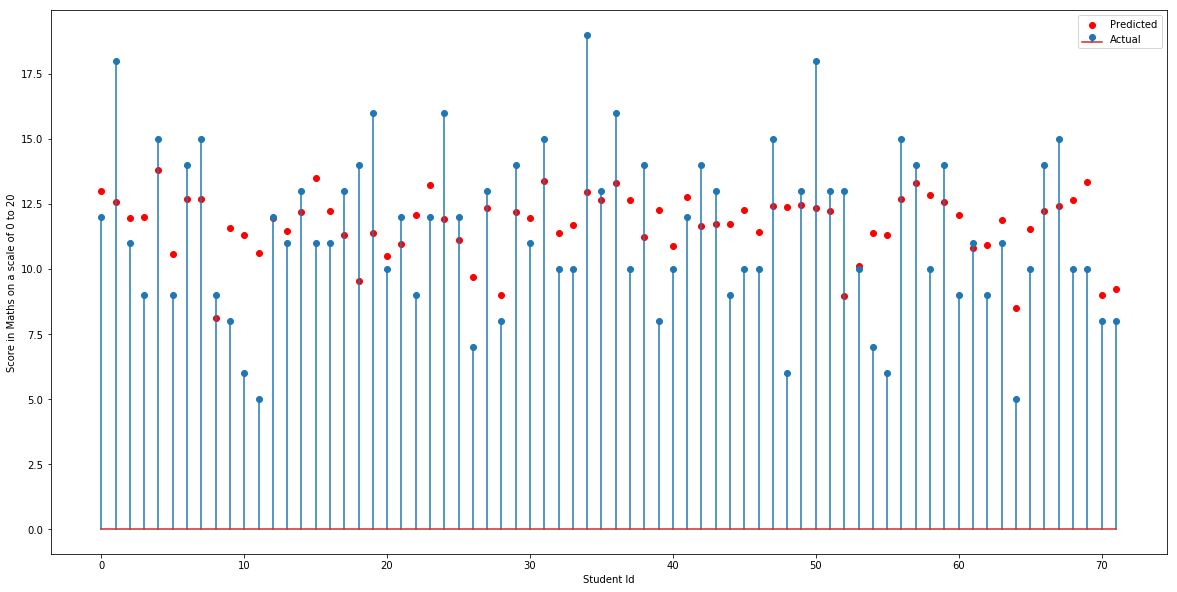

In [5]:
math_df = pd.read_csv('student-mat.csv')
column_names = ['Medu', 'Fedu','failures','goout','Dalc', 'Walc', 'freetime','health','absences','G3']
math_df = math_df[column_names]
math_df = math_df[math_df.G3 != 0]
target_math = math_df.G3
math_df = math_df.drop('G3', axis = 1)

math_train, math_test, math_target_train, math_target_test = train_test_split(math_df, target_math, test_size=0.20, random_state=42)

lm = LinearRegression()
lm.fit(math_train, math_target_train)
y_1 = lm.predict(math_test)
s = (y_1 - math_target_test.values)
s = abs(s)
soap = s.sum()
print('The mean absolute error is - ',soap/len(y_1))
rms = sqrt(mean_squared_error(math_target_test.values, y_1))
print('The root mean square error is - ',rms)
# Plotting the actual and predicted values
y = np.arange(len(y_1))
plt.figure(figsize=(20,10))
l1 = plt.scatter(y,y_1, color = 'red')
l2 = plt.stem(y,math_target_test.values,color = 'green')
plt.ylabel('Score in Maths on a scale of 0 to 20')
plt.xlabel('Student Id')
plt.legend((l1,l2),('Predicted','Actual'), loc = 'upper right')
plt.show()

A slightly better performance, than the previous one, now lets try all this on Portuguese class data set.

The mean absolute error is -  2.15590444712
The root mean square error is -  2.861577957475221


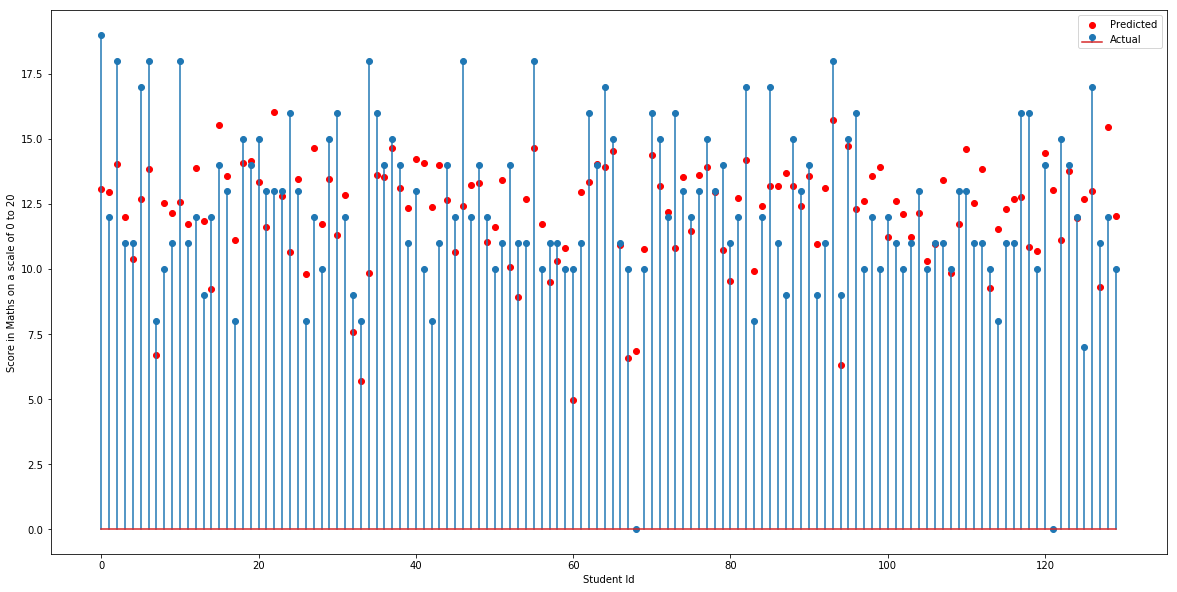

In [6]:
# Checking for the Portuguese
port_df = pd.read_csv('student-por.csv')
target_port = port_df.G3

port_df = port_df.drop('G1', axis = 1)
port_df = port_df.drop('G2', axis = 1)
port_df = port_df.drop('G3', axis = 1)

port_df.schoolsup = port_df.schoolsup.eq('yes').mul(1)
port_df.famsup = port_df.famsup.eq('yes').mul(1)
port_df.paid = port_df.paid.eq('yes').mul(1)
port_df.activities = port_df.activities.eq('yes').mul(1)
port_df.nursery = port_df.nursery.eq('yes').mul(1)
port_df.higher = port_df.higher.eq('yes').mul(1)
port_df.internet = port_df.internet.eq('yes').mul(1)
port_df.romantic = port_df.romantic.eq('yes').mul(1)

port_df = pd.get_dummies(port_df, columns=["school", "sex",'address', 'famsize','Pstatus', 'Mjob', 'Fjob','reason', 'guardian'])

port_train, port_test, port_target_train, port_target_test = train_test_split(port_df, target_port, test_size=0.20, random_state=42)

lm = LinearRegression()
lm.fit(port_train, port_target_train)
y_1 = lm.predict(port_test)
s = (y_1 - port_target_test.values)
s = abs(s)
soap = s.sum()
print('The mean absolute error is - ',soap/len(y_1))
rms = sqrt(mean_squared_error(port_target_test.values, y_1))
print('The root mean square error is - ',rms)
# Plotting the actual and predicted values
y = np.arange(len(y_1))
plt.figure(figsize=(20,10))
l1 = plt.scatter(y,y_1, color = 'red')
l2 = plt.stem(y,port_target_test.values,color = 'green')
plt.ylabel('Score in Maths on a scale of 0 to 20')
plt.xlabel('Student Id')
plt.legend((l1,l2),('Predicted','Actual'), loc = 'upper right')
plt.show()

Let's improve the accuracy by applying the techniques, which we applied the Math data set before.

The mean absolute error is -  2.02429872047
The root mean square error is -  2.5261620757167984


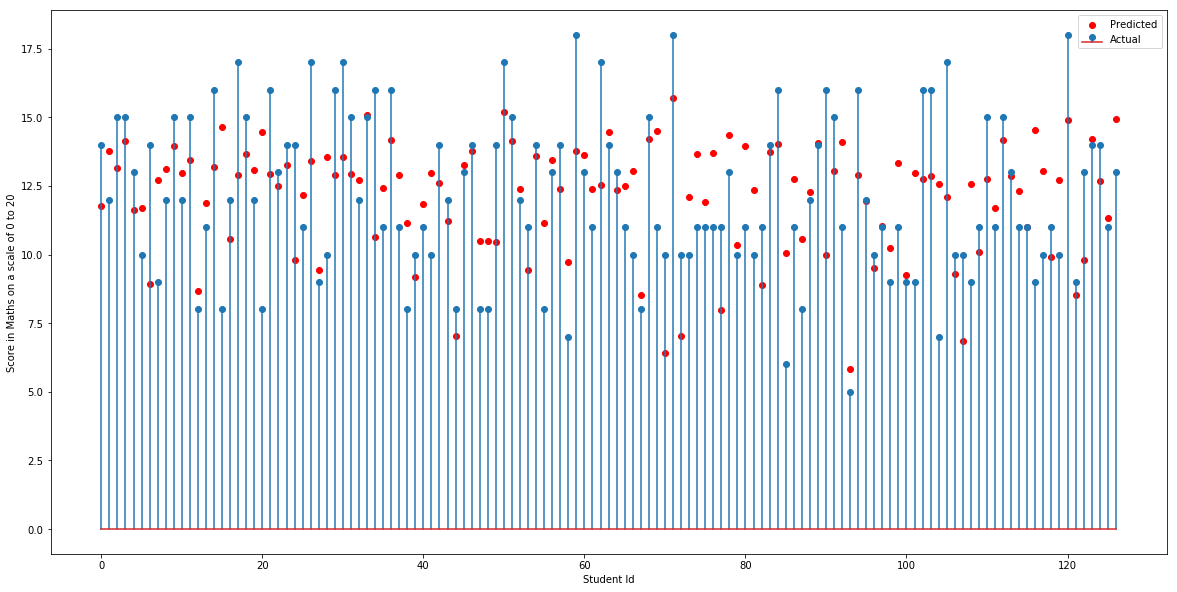

In [7]:
port_df = pd.read_csv('student-por.csv')
port_df = port_df[port_df.G3 != 0]
target_port = port_df.G3

port_df = port_df.drop('G1', axis = 1)
port_df = port_df.drop('G2', axis = 1)
port_df = port_df.drop('G3', axis = 1)

port_df.schoolsup = port_df.schoolsup.eq('yes').mul(1)
port_df.famsup = port_df.famsup.eq('yes').mul(1)
port_df.paid = port_df.paid.eq('yes').mul(1)
port_df.activities = port_df.activities.eq('yes').mul(1)
port_df.nursery = port_df.nursery.eq('yes').mul(1)
port_df.higher = port_df.higher.eq('yes').mul(1)
port_df.internet = port_df.internet.eq('yes').mul(1)
port_df.romantic = port_df.romantic.eq('yes').mul(1)

port_df = pd.get_dummies(port_df, columns=["school", "sex",'address', 'famsize','Pstatus', 'Mjob', 'Fjob','reason', 'guardian'])

port_train, port_test, port_target_train, port_target_test = train_test_split(port_df, target_port, test_size=0.20, random_state=42)

lm = LinearRegression()
lm.fit(port_train, port_target_train)
y_1 = lm.predict(port_test)
s = (y_1 - port_target_test.values)
s = abs(s)
soap = s.sum()
print('The mean absolute error is - ',soap/len(y_1))
rms = sqrt(mean_squared_error(port_target_test.values, y_1))
print('The root mean square error is - ',rms)
# Plotting the actual and predicted values
y = np.arange(len(y_1))
plt.figure(figsize=(20,10))
l1 = plt.scatter(y,y_1, color = 'red')
l2 = plt.stem(y,port_target_test.values,color = 'green')
plt.ylabel('Score in Maths on a scale of 0 to 20')
plt.xlabel('Student Id')
plt.legend((l1,l2),('Predicted','Actual'), loc = 'upper right')
plt.show()


A huge improvement in the performance of the model is observed, Now lets only consider the features which had a high co relation (either positive or negative) with the final grades and see if we can improve the performance.
So, for this we will only consider features like     
1) Mother and Father education   
2) Number of Failures in past   
3) Hanging out time with friends     
4) Alcohol consumption        
5) Taking study time and family relationship features
Reading the data again and keeping only above mentioned features-


The mean absolute error is -  2.09860441977
The root mean square error is -  2.5504505777068966


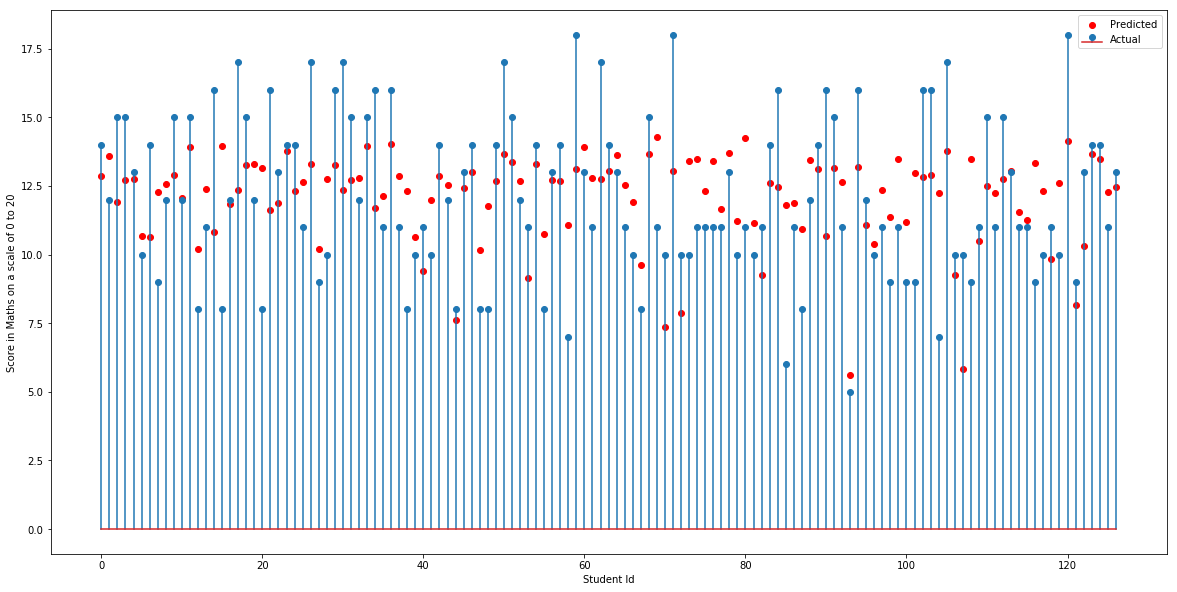

In [8]:

port_df = pd.read_csv('student-por.csv')
column_names = ['Medu', 'Fedu','failures','goout','Dalc', 'Walc','famrel','studytime','G3']

port_df = port_df[column_names]

port_df = port_df[port_df.G3 != 0]

target_port = port_df.G3

port_df = port_df.drop('G3', axis = 1)

port_train, port_test, port_target_train, port_target_test = train_test_split(port_df, target_port, test_size=0.20, random_state=42)

lm = LinearRegression()
lm.fit(port_train, port_target_train)
y_1 = lm.predict(port_test)
s = (y_1 - port_target_test.values)
s = abs(s)
soap = s.sum()
print('The mean absolute error is - ',soap/len(y_1))
rms = sqrt(mean_squared_error(port_target_test.values, y_1))
print('The root mean square error is - ',rms)
# Plotting the actual and predicted values
y = np.arange(len(y_1))
plt.figure(figsize=(20,10))
l1 = plt.scatter(y,y_1, color = 'red')
l2 = plt.stem(y,port_target_test.values,color = 'green')
plt.ylabel('Score in Maths on a scale of 0 to 20')
plt.xlabel('Student Id')
plt.legend((l1,l2),('Predicted','Actual'), loc = 'upper right')
plt.show()

SO, it can be observed that there is no significant improvement in the model after choosing a the features which have direct relation     
with the grades. But, having less features might give fast training time for the ML model.

# Implementing a Support Vector Regression

In [9]:

# Reading the data
math_df = pd.read_csv('student-mat.csv')
target_math = math_df.G3
math_df = math_df.drop('G1', axis = 1)
math_df = math_df.drop('G2', axis = 1)
math_df = math_df.drop('G3', axis = 1)
math_df.schoolsup = math_df.schoolsup.eq('yes').mul(1)
math_df.famsup = math_df.famsup.eq('yes').mul(1)
math_df.paid = math_df.paid.eq('yes').mul(1)
math_df.activities = math_df.activities.eq('yes').mul(1)
math_df.nursery = math_df.nursery.eq('yes').mul(1)
math_df.higher = math_df.higher.eq('yes').mul(1)
math_df.internet = math_df.internet.eq('yes').mul(1)
math_df.romantic = math_df.romantic.eq('yes').mul(1)
math_df = pd.get_dummies(math_df, columns=["school", "sex",'address', 'famsize','Pstatus', 'Mjob', 'Fjob','reason', 'guardian'])
math_train, math_test, math_target_train, math_target_test = train_test_split(math_df, target_math, test_size=0.20, random_state=42)


svr_rbf = SVR(kernel='rbf', C=1e1, gamma=0.001)
svr_lin = SVR(kernel='linear', C=1e1)
svr_poly = SVR(kernel='poly', C=1e1, degree=3)
y_rbf = svr_rbf.fit(math_train, math_target_train).predict(math_test)
y_lin = svr_lin.fit(math_train, math_target_train).predict(math_test)
y_poly = svr_poly.fit(math_train, math_target_train).predict(math_test)
s = (y_rbf - math_target_test.values)
s = abs(s)
soap = s.sum()
print('For the rbf model the mean absoulte error (ABS) is - ',soap/len(y_rbf))
rms = sqrt(mean_squared_error(math_target_test.values, y_rbf))
print('For the rbf model the mean squared error (MSE) is - ', rms)
s = (y_lin - math_target_test.values)
s = abs(s)
soap = s.sum()
print('For the linear model the mean absoulte error (ABS) is - ',soap/len(y_lin))
rms = sqrt(mean_squared_error(math_target_test.values, y_lin))
print('For the linear model the mean squared error (MSE) is - ', rms)
s = (y_poly - math_target_test.values)
s = abs(s)
soap = s.sum()
print('For the polynomial model the mean absoulte error (ABS) is - ',soap/len(y_poly))
rms = sqrt(mean_squared_error(math_target_test.values, y_poly))
print('For the polynomial model the mean squared error (MSE) is - ', rms)

For the rbf model the mean absoulte error (ABS) is -  3.33858949085
For the rbf model the mean squared error (MSE) is -  4.163437098068229
For the linear model the mean absoulte error (ABS) is -  3.3911370725
For the linear model the mean squared error (MSE) is -  4.237854933300475
For the polynomial model the mean absoulte error (ABS) is -  4.99270036848
For the polynomial model the mean squared error (MSE) is -  7.128147385496756


The best results are in RBF model, we will try to improve it now.


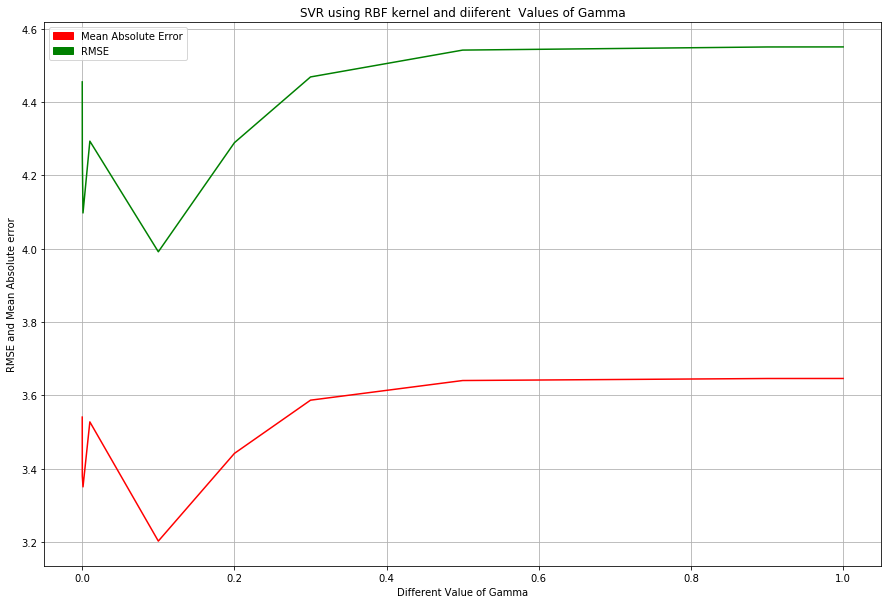

In [10]:
CValue = 1
ListCValue = []
#gammaValue = [.00001, .0001, .001, .01 , .1, 0.3, 0.5, 0.9, 1.0, 1.5, 1.8, 2.0, 2.5, 3.1,3.5,3.9, 4.5, 5.0,10.0]
gammaValue = [.00001, .0001, .001, .01,.1,.2, 0.3,0.5,0.9,1]
absoluteValueList = []
rmseList = []
for each in gammaValue:
    svr_rbf = SVR(kernel='rbf', C=50, gamma=each)
    y_rbf = svr_rbf.fit(math_train, math_target_train).predict(math_test)
    s = (y_rbf - math_target_test.values)
    s = abs(s)
    soap = s.sum()
    absoluteValue = soap/len(y_rbf)
    absoluteValueList.append(absoluteValue)
    #print('For the rbf model the mean absoulte error (ABS) is - ',absoluteValue)
    rms = sqrt(mean_squared_error(math_target_test.values, y_rbf))
    rmseList.append(rms)
    #print('For the rbf model the mean squared error (MSE) is - ', rms)
    #CValue = CValue + 10
    #gammaValue = 0.001 ** 10
CabsoluteValueList = []
CrmseList = []
while CValue <101:
    svr_rbf = SVR(kernel='rbf', C=CValue, gamma=0.1)
    y_rbf = svr_rbf.fit(math_train, math_target_train).predict(math_test)
    s = (y_rbf - math_target_test.values)
    s = abs(s)
    soap = s.sum()
    absoluteValue = soap/len(y_rbf)
    CabsoluteValueList.append(absoluteValue)
    #print('For the rbf model the mean absoulte error (ABS) is - ',absoluteValue)
    rms = sqrt(mean_squared_error(math_target_test.values, y_rbf))
    CrmseList.append(rms)
    ListCValue.append(CValue)
    CValue =  CValue + 2 
    


# below is the analysis of performance Vs. diiferent values of Gamma for a SVR using a RBF kernel
plt.figure(figsize=(15,10))
L1 = plt.plot(gammaValue,absoluteValueList, color = 'r')
L2 = plt.plot(gammaValue,rmseList, color = 'g')
#for xy in zip(L1,L2):
#    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('Different Value of Gamma')
plt.ylabel('RMSE and Mean Absolute error')
red_patch = mpatches.Patch(color='r', label='Mean Absolute Error')
green_patch = mpatches.Patch(color='g', label='RMSE')
plt.legend(handles=[red_patch, green_patch])
plt.title('SVR using RBF kernel and diiferent  Values of Gamma')
plt.grid()
plt.show()



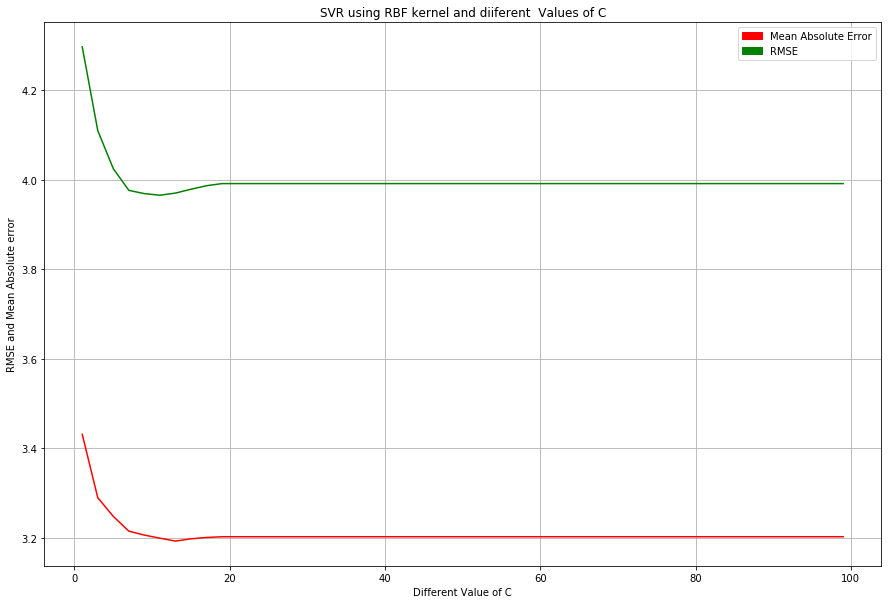

In [11]:
# below is the analysis of performance Vs. diiferent values of C for a SVR using a RBF kernel
plt.figure(figsize=(15,10))
C1 = plt.plot(ListCValue,CabsoluteValueList, color = 'r')
C2 = plt.plot(ListCValue,CrmseList, color = 'g')
plt.xlabel('Different Value of C')
plt.ylabel('RMSE and Mean Absolute error')
plt.legend(handles=[red_patch, green_patch])
plt.title('SVR using RBF kernel and diiferent  Values of C')
plt.grid()
plt.show()

The optimum paramertes are C = 16 and gamma = 0.1,     
The Mean ABS is 3.19 and RMSE is 3.85 for C =16 and    
The Mean ABS is 3.2 and RMSE is 4.0 for gamma = 0.1

In [12]:
# Now using the optimum values of C and Gamma from the above analysis. Choosing the features which has high correlation with 
# the final grades and see if the performance improves.

math_df = pd.read_csv('student-mat.csv')
column_names = ['Medu', 'Fedu','failures','goout','Dalc', 'Walc', 'freetime','health','absences','G3']
math_df = math_df[column_names]
math_df = math_df[math_df.G3 != 0]
target_math = math_df.G3
math_df = math_df.drop('G3', axis = 1)

math_train, math_test, math_target_train, math_target_test = train_test_split(math_df, target_math, test_size=0.20, random_state=42)


svr_rbf = SVR(kernel='rbf', C=10, gamma=0.01)
svr_lin = SVR(kernel='linear', C=100)
svr_poly = SVR(kernel='poly', C=1e1, degree=3)
y_rbf = svr_rbf.fit(math_train, math_target_train).predict(math_test)
y_lin = svr_lin.fit(math_train, math_target_train).predict(math_test)
y_poly = svr_poly.fit(math_train, math_target_train).predict(math_test)
s = (y_rbf - math_target_test.values)
s = abs(s)
soap = s.sum()
print('For the rbf model the mean absoulte error (ABS) is - ',soap/len(y_rbf))
rms = sqrt(mean_squared_error(math_target_test.values, y_rbf))
print('For the rbf model the mean squared error (MSE) is - ', rms)
s = (y_lin - math_target_test.values)
s = abs(s)
soap = s.sum()
print('For the linear model the mean absoulte error (ABS) is - ',soap/len(y_lin))
rms = sqrt(mean_squared_error(math_target_test.values, y_lin))
print('For the linear model the mean squared error (MSE) is - ', rms)
s = (y_poly - math_target_test.values)
s = abs(s)
soap = s.sum()
print('For the polynomial model the mean absoulte error (ABS) is - ',soap/len(y_poly))
rms = sqrt(mean_squared_error(math_target_test.values, y_poly))
print('For the polynomial model the mean squared error (MSE) is - ', rms)

For the rbf model the mean absoulte error (ABS) is -  2.29679358806
For the rbf model the mean squared error (MSE) is -  2.8287503583335916
For the linear model the mean absoulte error (ABS) is -  2.23859038478
For the linear model the mean squared error (MSE) is -  2.766585389350325
For the polynomial model the mean absoulte error (ABS) is -  3.22856612826
For the polynomial model the mean squared error (MSE) is -  4.184247462234761


It can be observed that after choosing limited features and optimum values of C and Gamma, the SVR model with an RBF has a better  accuracy at the same time, the SVR with a linear model also have performance equal to the previous one.

In [13]:
# Running results on the Portuguese data set.
port_df = pd.read_csv('student-por.csv')
column_names = ['Medu', 'Fedu','failures','goout','Dalc', 'Walc','famrel','studytime','G3']

port_df = port_df[column_names]

port_df = port_df[port_df.G3 != 0]

target_port = port_df.G3

port_df = port_df.drop('G3', axis = 1)

port_train, port_test, port_target_train, port_target_test = train_test_split(port_df, target_port, test_size=0.20, random_state=42)


svr_rbf = SVR(kernel='rbf', C=1e1, gamma=0.001)
svr_lin = SVR(kernel='linear', C=1e1)
svr_poly = SVR(kernel='poly', C=1e1, degree=3)
y_rbf = svr_rbf.fit(port_train, port_target_train).predict(port_test)
y_lin = svr_lin.fit(port_train, port_target_train).predict(port_test)
y_poly = svr_poly.fit(port_train, port_target_train).predict(port_test)
s = (y_rbf - port_target_test.values)
s = abs(s)
soap = s.sum()
print('For the rbf model the mean absoulte error (ABS) is - ',soap/len(y_rbf))
rms = sqrt(mean_squared_error(port_target_test.values, y_rbf))
print('For the rbf model the mean squared error (MSE) is - ', rms)
s = (y_lin - port_target_test.values)
s = abs(s)
soap = s.sum()
print('For the linear model the mean absoulte error (ABS) is - ',soap/len(y_lin))
rms = sqrt(mean_squared_error(port_target_test.values, y_lin))
print('For the linear model the mean squared error (MSE) is - ', rms)
s = (y_poly - port_target_test.values)
s = abs(s)
soap = s.sum()
print('For the polynomial model the mean absoulte error (ABS) is - ',soap/len(y_poly))
rms = sqrt(mean_squared_error(port_target_test.values, y_poly))
print('For the polynomial model the mean squared error (MSE) is - ', rms)

For the rbf model the mean absoulte error (ABS) is -  2.10677123252
For the rbf model the mean squared error (MSE) is -  2.559883525632845
For the linear model the mean absoulte error (ABS) is -  2.11008185163
For the linear model the mean squared error (MSE) is -  2.5580994425847607
For the polynomial model the mean absoulte error (ABS) is -  2.1948988296
For the polynomial model the mean squared error (MSE) is -  2.771123251157194


# Implementing Ensemble learning Methods, using Decision Tree regressor as the base model

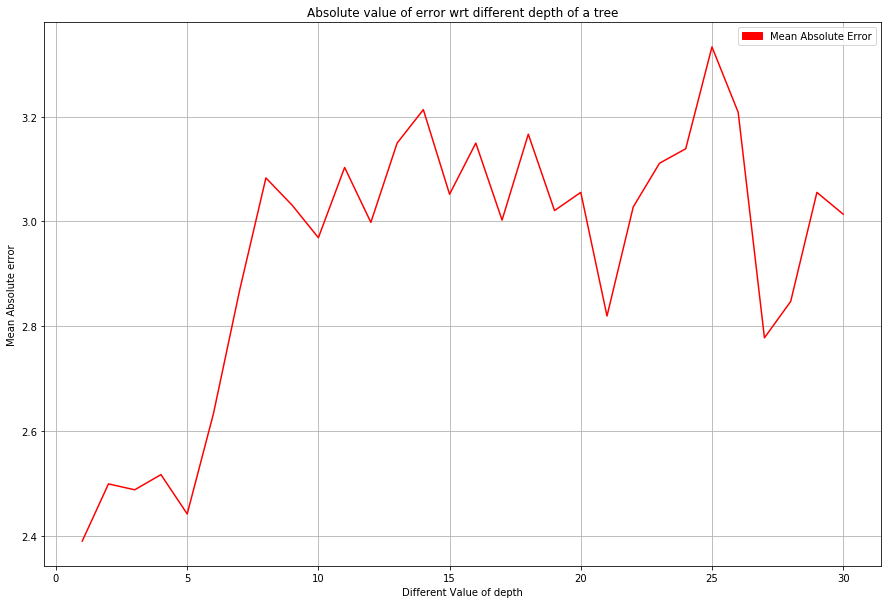

In [14]:
# one of the challenges in the ensemble learning technique is to find the optimum parameters. Using a Decision tree regressor as 
# the base model, one need to find the optimum depth. Below is a code which simulates a decision tree regressor with multiple depth
# and see which one performs better.The best depth  is then used in the Ensemble Learning Technique.

math_df = pd.read_csv('student-mat.csv')
column_names = ['Medu', 'Fedu','failures','goout','Dalc', 'Walc', 'freetime','health','absences','G3']
math_df = math_df[column_names]
math_df = math_df[math_df.G3 != 0]
target_math = math_df.G3
math_df = math_df.drop('G3', axis = 1)

math_train, math_test, math_target_train, math_target_test = train_test_split(math_df, target_math, test_size=0.20, random_state=42)

i = 1
absList = []
depthValue = []
while i <31:
    regression_tree = DecisionTreeRegressor(max_depth=i)
    regression_tree.fit(math_train, math_target_train)
    y_1 = regression_tree.predict(math_test)
    s = (y_1 - math_target_test.values)
    s = abs(s)
    soap = s.sum()
    absoluteError = soap/len(y_1)
    absList.append(absoluteError)
    #print('For the rbf model the mean absoulte error (ABS) is - ',absoluteError)
    rms = sqrt(mean_squared_error(math_target_test.values, y_1))
    #print('For the rbf model the mean squared error (MSE) is - ', rms)
    depthValue.append(i)
    i = i+1

    
plt.figure(figsize=(15,10))
plt.plot(depthValue,absList, color = 'r')
#L2 = plt.plot(depthValue,rmseList, color = 'g')
#for xy in zip(L1,L2):
#    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('Different Value of depth')
plt.ylabel('Mean Absolute error')
red_patch = mpatches.Patch(color='r', label='Mean Absolute Error')
#green_patch = mpatches.Patch(color='g', label='RMSE')
plt.legend(handles=[red_patch])
plt.title('Absolute value of error wrt different depth of a tree')
plt.grid()
plt.show()



It looks 5 is the best depth of a tree for the decision tree regressor, lets see if we can improve accuracy using the 
Ensemble learning techniques

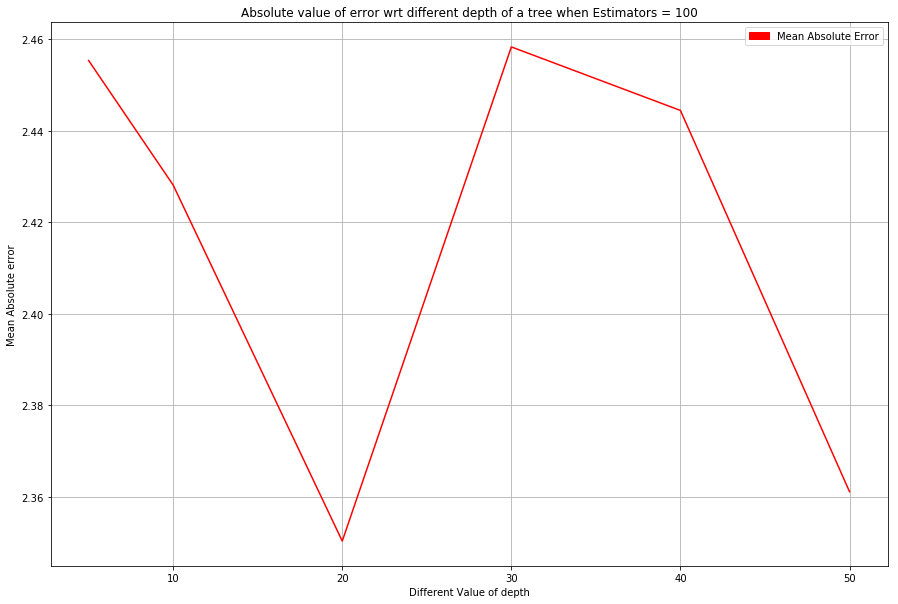

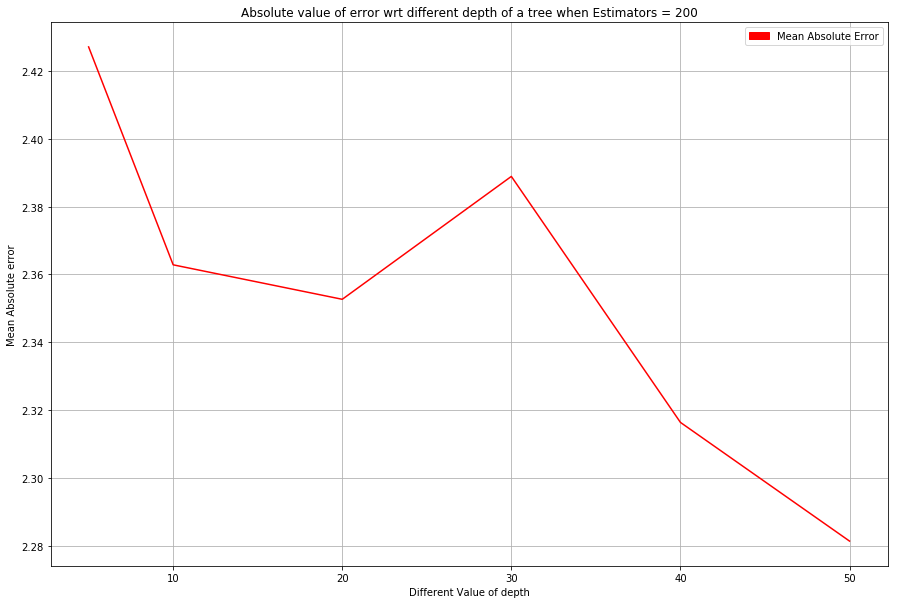

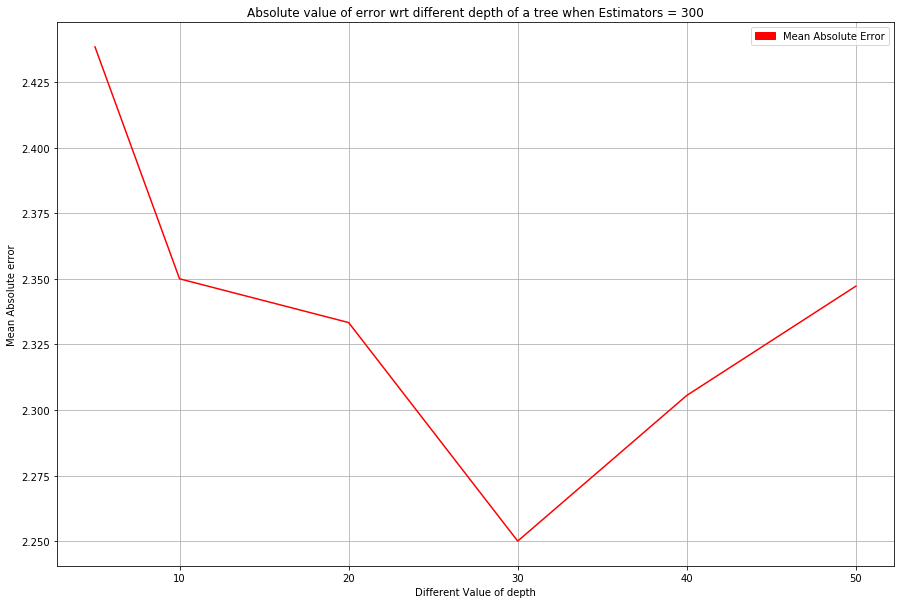

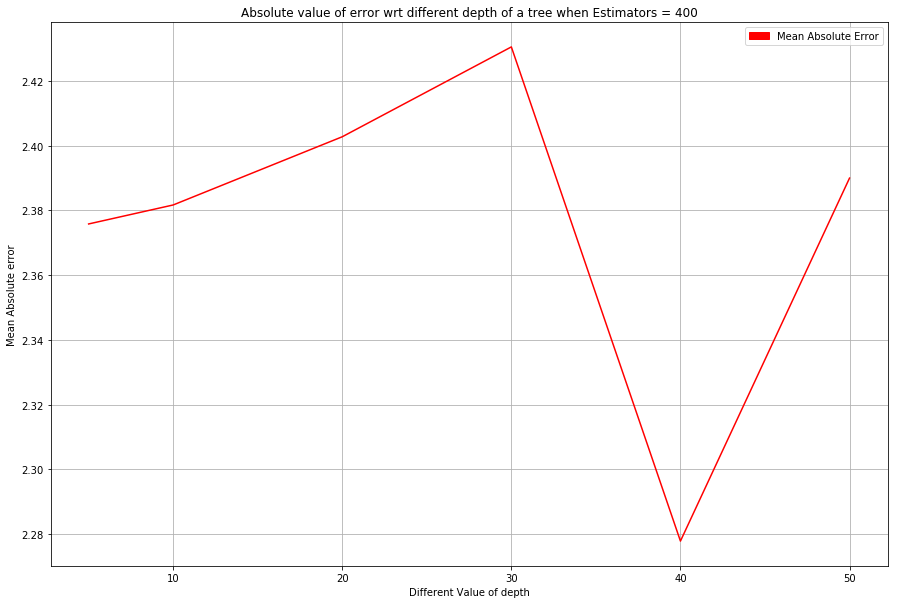

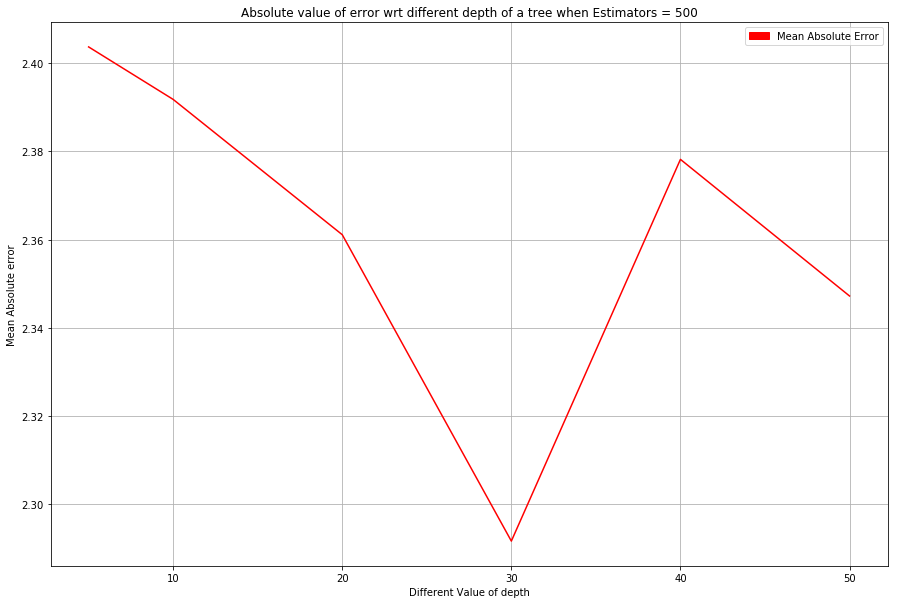

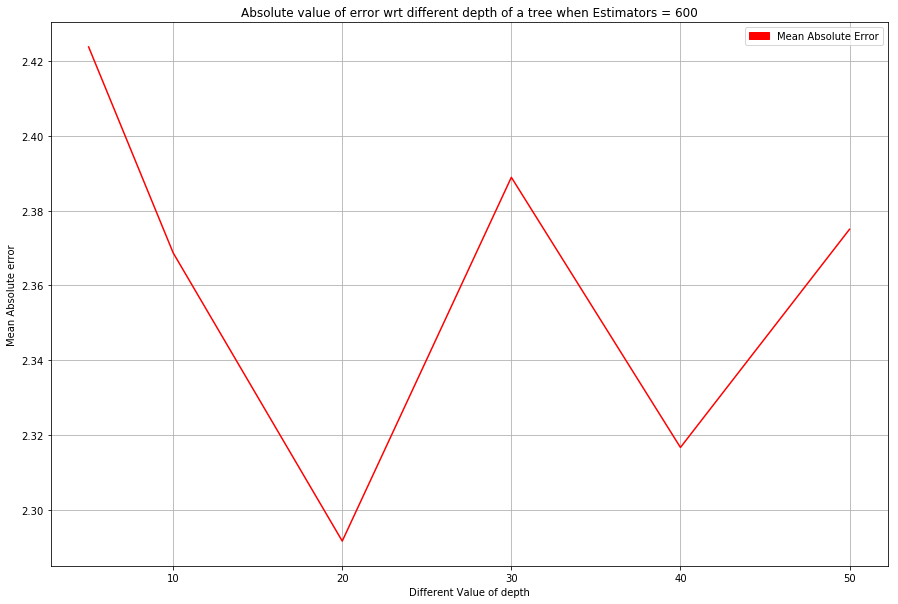

In [15]:
# Fit regression model using Ensemble learning technique. 
rng = np.random.RandomState(1)
absList = []
depths = [5,10,20,30,40,50]
estimators = [100,200,300,400,500,600]
for eachEstimator in estimators:
    absList = []
    for depth in depths:
        regr_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=depth),n_estimators=eachEstimator, random_state=rng)
        regr_1.fit(math_train, math_target_train)
        y_1 = regr_1.predict(math_test)
        s = (y_1 - math_target_test.values)
        s = abs(s)
        soap = s.sum()
        absoluteError = soap/len(y_1)
        absList.append(absoluteError)
    plt.figure(figsize=(15,10))
    plt.plot(depths,absList, color = 'r')
    plt.xlabel('Different Value of depth')
    plt.ylabel('Mean Absolute error')
    red_patch = mpatches.Patch(color='r', label='Mean Absolute Error')
    plt.legend(handles=[red_patch])
    xString = 'Absolute value of error wrt different depth of a tree when Estimators = ' + str(eachEstimator)
    plt.title(xString)
    plt.grid()
    plt.show()
        




Different number of estimators yield different results for different number of depth. There are many optimum slution to this problem if Ensemble learning is used.    

Final run for the Portuguese class-


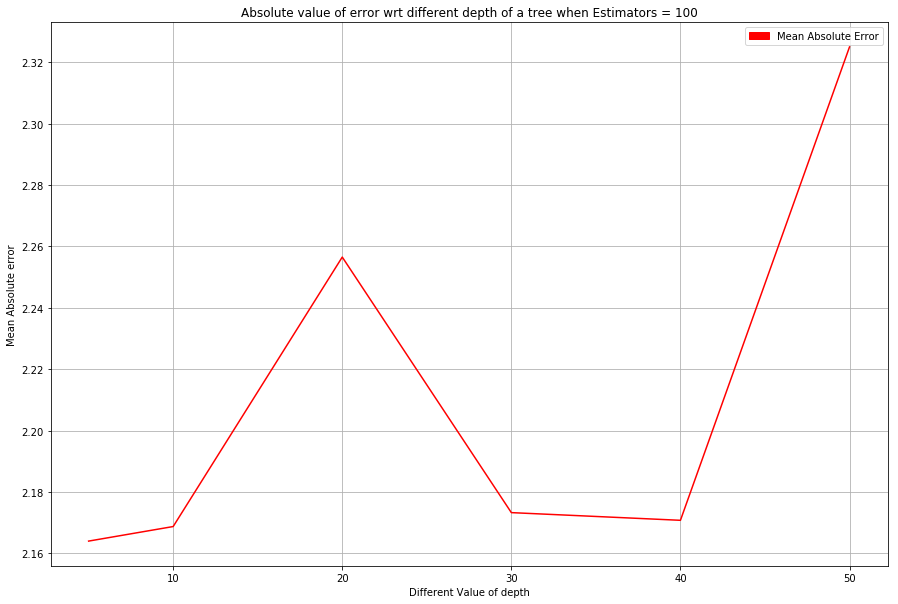

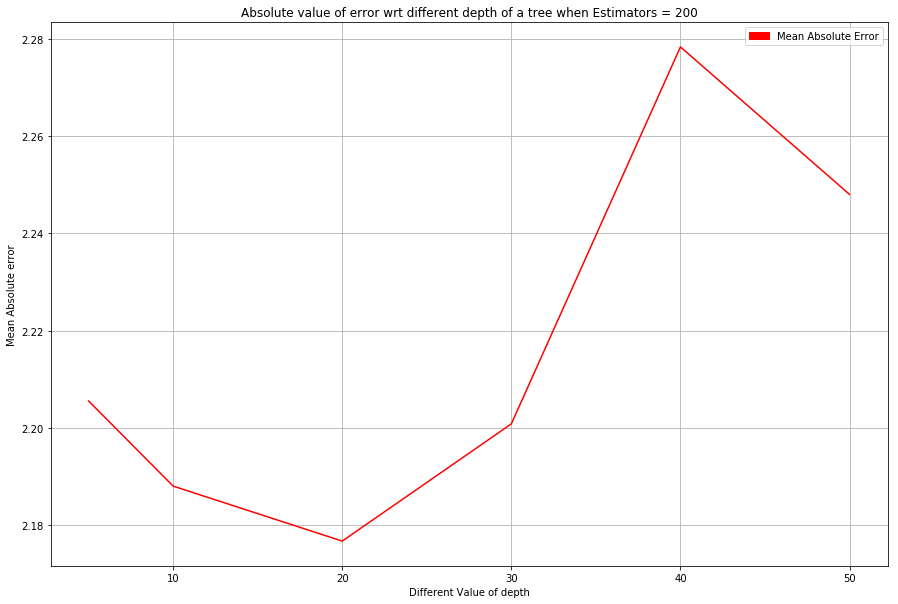

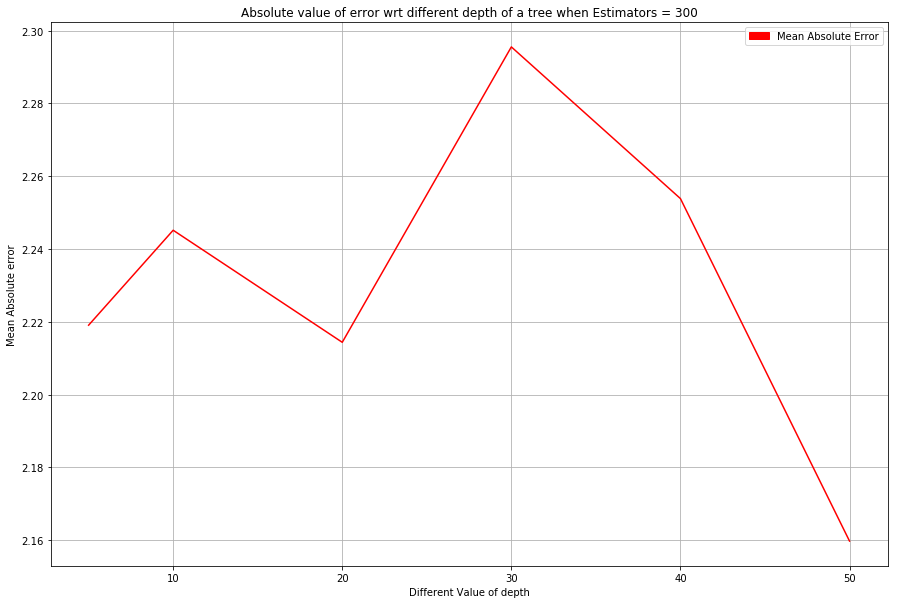

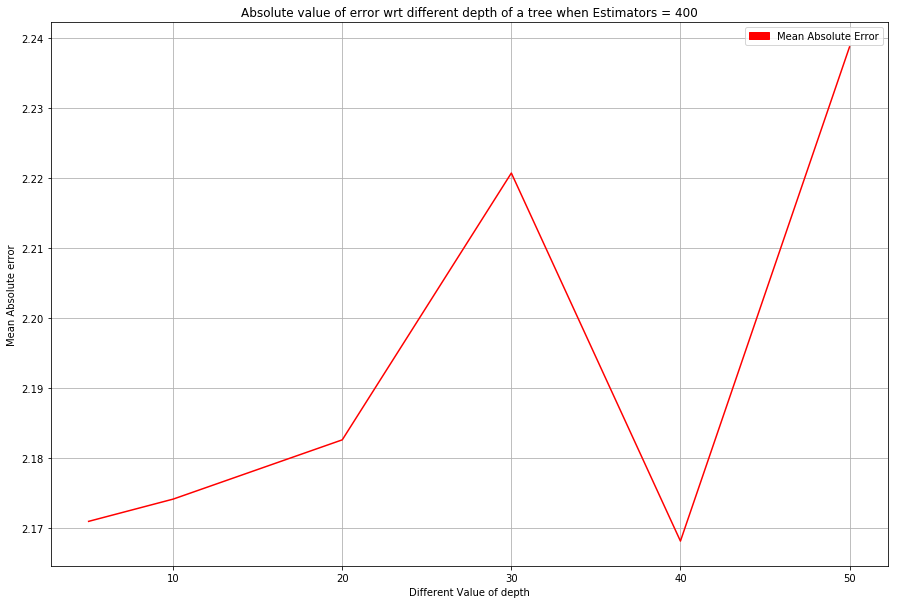

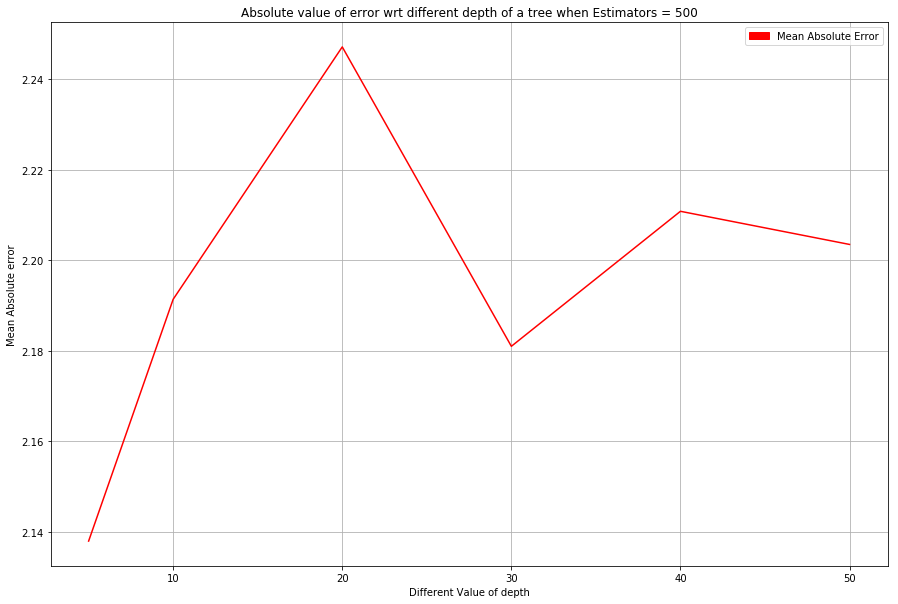

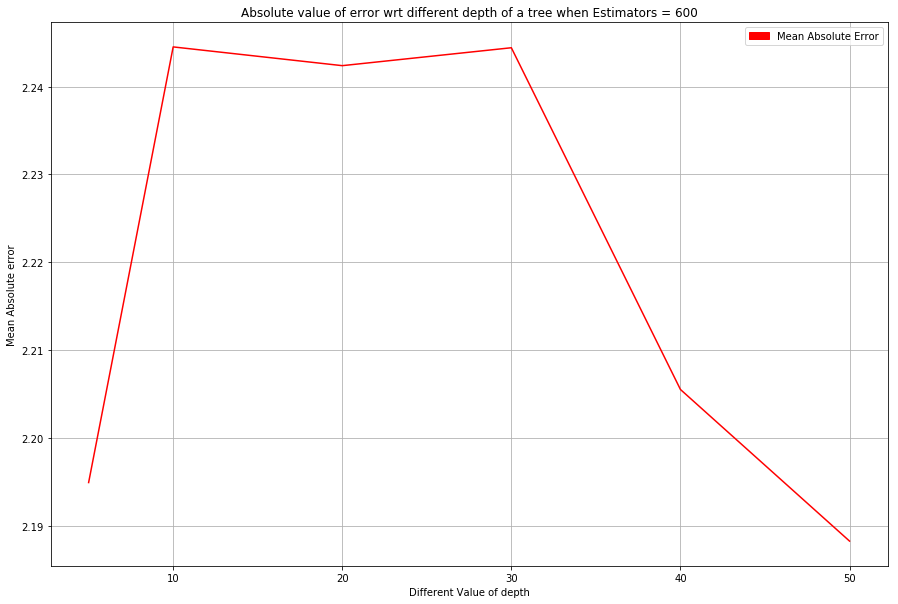

In [16]:
port_df = pd.read_csv('student-por.csv')
column_names = ['Medu', 'Fedu','failures','goout','Dalc', 'Walc','famrel','studytime','G3']

port_df = port_df[column_names]

port_df = port_df[port_df.G3 != 0]

target_port = port_df.G3

port_df = port_df.drop('G3', axis = 1)

port_train, port_test, port_target_train, port_target_test = train_test_split(port_df, target_port, test_size=0.20, random_state=42)
rng = np.random.RandomState(1)
absList = []
depths = [5,10,20,30,40,50]
estimators = [100,200,300,400,500,600]
for eachEstimator in estimators:
    absList = []
    for depth in depths:
        regr_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=depth),n_estimators=eachEstimator, random_state=rng)
        regr_1.fit(port_train, port_target_train)
        y_1 = regr_1.predict(port_test)
        s = (y_1 - port_target_test.values)
        s = abs(s)
        soap = s.sum()
        absoluteError = soap/len(y_1)
        absList.append(absoluteError)
    plt.figure(figsize=(15,10))
    plt.plot(depths,absList, color = 'r')
    plt.xlabel('Different Value of depth')
    plt.ylabel('Mean Absolute error')
    red_patch = mpatches.Patch(color='r', label='Mean Absolute Error')
    plt.legend(handles=[red_patch])
    xString = 'Absolute value of error wrt different depth of a tree when Estimators = ' + str(eachEstimator)
    plt.title(xString)
    plt.grid()
    plt.show()
        


plt.show()


# Conclusion-
1) Linear Regression has the best results.   
2) Using Limited features like-   
    a) Mother and Father education   
    b) Number of Failures in past    
    c) Hanging out time with friends    
    d) Alcohol consumption    
    e) Taking study time and family relationship features      
   Improves the accuracy of the Linear Regression model.     
3) The best results for a Support Vector Regression comes from using a RBF kernel with C = 16 and gamma = 0.1    
4) Different decision tree regressor were simulated to find the optimum depth of a tree. 20 Comes out to be the best depth for the  tree.      
5) Plugging the best depth into an Ensemble learning technique, it is observed that different models give different performance when different depth are plugged in.     
6) The best performance is at a depth of 30 with 300 estimators in the Ensemble learning model (maths) and for Portuguese (n = 500, and depth = 5).           

Finally, it can be concluded that-

1) Mother and Father education contributes most to the final grades of  a student.   
2) Alcohol Consumption is directly related to the strength of a Family relationship. A student with a strong family relationship has a less probability of drinking less Alcohol.  
3) Also, drinking more alcohol can bring down your grades. However, there are few exceptions where hive volume of drinking alcohol does not bring the grades down. They are students who believes in "Work Hard and Party hard".   
4) Higher study time results in better grades for the students in Portuguese.   
5) Number of failures are negatively correlated with the student final grade, it means that higher the number of failures, lower the score of a student.   
6) In last, it is found in this study that, 24 % of student's drink Alcohol illegally, Government shall issue a mandate to the Liquor shops, asking them to strictly verify the Id's of customers who are coming in store to buy Alcohol.    
